In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('./Resources/gtt_results.csv')
df.dropna(axis='rows', inplace=True)
df.head()


,id,group,sex,bodyweight,timepoint,t0,t15,t30,t60,t90,t120
0,F208,WT,F,22.8,0,122,194,196.0,188.0,186.0,189.0
1,F039,CLOCK,F,26.7,0,188,165,355.0,596.0,218.0,206.0
2,F014,WT,F,25.1,0,182,289,240.0,219.0,205.0,231.0
3,F081,CLOCK,F,26.1,0,183,266,206.0,214.0,246.0,168.0
4,F051,WT,F,29.8,0,141,199,200.0,171.0,181.0,145.0


In [3]:
df_sex = df[['sex', 'bodyweight', 'timepoint', 't0', 't15', 't30', 't60', 't90', 't120']]

In [4]:
#Assign features
X = df[['bodyweight', 'timepoint', 't0', 't15', 't30', 't60', 't90', 't120']]
y = df.sex
y = pd.Series(np.where(y.values == 'F', 1, 0),
          y.index)

# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
#without scaling
model = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1).fit(X_train, y_train)

print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 0.972027972027972
Testing Score: 0.9583333333333334


In [7]:
pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(pred, y_test)}')
print(f'Confusion Matrix: {confusion_matrix(pred, y_test)}')


Accuracy: 0.9583333333333334
Confusion Matrix: [[22  1]
 [ 1 24]]


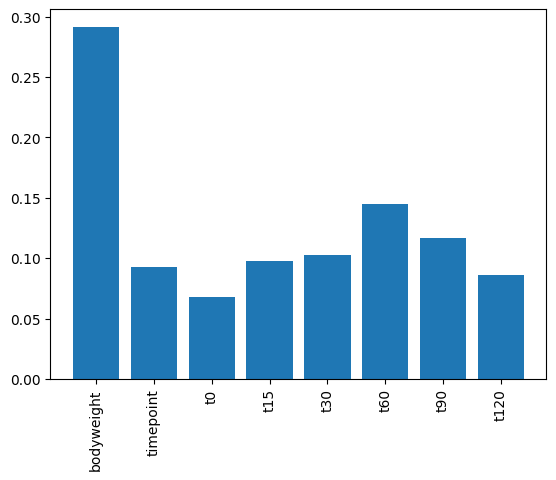

In [8]:
features = model.feature_importances_
plt.bar(x = model.feature_names_in_, height=features)
plt.xticks(rotation = 90)
plt.show()


In [9]:
#with scaling
model_scaled = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1).fit(X_train_scaled, y_train)

print(f'Training Score: {model_scaled.score(X_train_scaled, y_train)}')
print(f'Testing Score: {model_scaled.score(X_test_scaled, y_test)}')

Training Score: 0.972027972027972
Testing Score: 0.9375


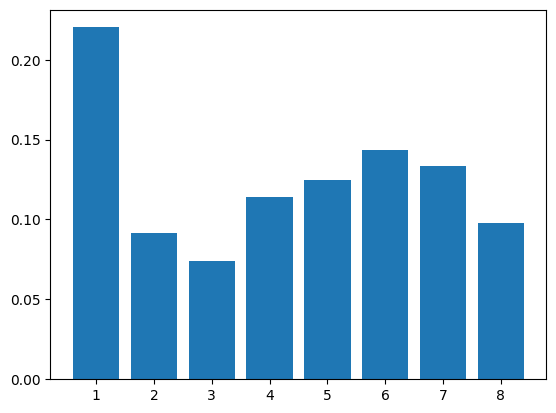

In [10]:
features_scaled = model_scaled.feature_importances_
plt.bar(x = np.arange(1,len(features_scaled)+1, 1), height=features_scaled)
plt.xticks(rotation = 0)
plt.show()


## Pull in random results from old experiment


In [11]:
df_rand = pd.read_csv('./Resources/random_results.csv')
df_rand.head()

,bodyweight,timepoint,t0,t15,t30,t60,t90,t120,sex
0,37.1,4,117,469,516,254,198,178,M
1,29.3,4,95,396,333,232,189,165,M
2,35.8,4,115,371,487,326,267,209,M
3,25.7,4,80,223,232,180,201,164,M
4,41.2,4,124,391,432,298,231,188,M


In [12]:
X_rand = df_rand.drop('sex', axis = 1)
y_rand = df_rand.sex
y_rand = pd.Series(np.where(y_rand.values == 'F', 1, 0),
          y_rand.index)

In [13]:
y_rand_pred = model.predict(X_rand)

In [14]:
print(f'Prediction Score: {model.score(X_rand, y_rand)}')
print(f'Mean Squared Error: {mean_squared_error(y_rand, y_rand_pred)}')


Prediction Score: 0.7419354838709677
Mean Squared Error: 0.25806451612903225


In [15]:
confusion_matrix(y_rand, y_rand_pred)

array([[23,  8],
       [ 0,  0]])

In [16]:
accuracy_score(y_rand, y_rand_pred)

0.7419354838709677